In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
hdul = fits.open("Some_Random_Stars_2s_ISO_400.fits")
star_map = hdul[0].data

# Red Star

In [3]:
selected_pixel = star_map[2240:2290, 2960:3010]
star_pixels = np.argwhere(selected_pixel > 30)

ymin_sun, xmin_sun = np.min(star_pixels, axis=0)
ymax_sun, xmax_sun = np.max(star_pixels, axis=0)
xdiameter, ydiameter = xmax_sun - xmin_sun, ymax_sun - ymin_sun
y_com, x_com = np.mean(star_pixels, axis=0)

print("X_min:", 2960 + xmin_sun)
print("X_max:", 2960 + xmax_sun)
print("Y_min:", 2240 + ymin_sun)
print("Y_max:", 2240 + ymax_sun)
print("xdiameter:", xdiameter, ", ydiameter:", ydiameter)
print("x com:", 2960 + int(x_com), "y com:", 2240 + int(y_com))

X_min: 2960
X_max: 3009
Y_min: 2240
Y_max: 2289
xdiameter: 49 , ydiameter: 49
x com: 2984 y com: 2264


In [4]:
readnoise = 1
gain = 1

y, x = np.ogrid[0: selected_pixel.shape[-2], 0: selected_pixel.shape[-1]]
pix_dists = np.sqrt((x - x_com)**2 + (y - y_com)**2)

max_snr = 0
snrs = []
radius_s = []
for radius in range(1, 40):
    peak_brightness = np.max(selected_pixel[pix_dists <= 3 * radius])
    star_data = selected_pixel[pix_dists <= radius]
    sum_brightness = np.sum(star_data)

    BG_data = (selected_pixel[(20 < pix_dists) & (pix_dists < 30)])
    BG_brightness = np.median(BG_data) * len(star_data)
    BG_noise = sum_brightness

    corrected_brightness = sum_brightness - BG_brightness
    noise = np.sqrt(
        (BG_noise / gain)
        + (len(star_data) * readnoise)**2)
    snr = corrected_brightness / gain / noise

    if snr > max_snr:
        max_snr = snr
        star_radius = radius
        uncertainty = 1.08 / max_snr
        instrumental_mag = -2.5 * np.log10(corrected_brightness/2)
    snrs.append(snr)
    radius_s.append(radius)

red_star_mag = instrumental_mag
red_star_uncertainty = uncertainty
c = 4.12 - red_star_mag

print("Star Radius:", star_radius)
print("Instrumental Mag:", instrumental_mag)
print("C: ", c)
print("Uncertainty:", uncertainty)
print("SNR_Max: ", max_snr)

Star Radius: 9
Instrumental Mag: -14.496736217379693
C:  18.616736217379692
Uncertainty: 0.001174181198765726
SNR_Max:  919.7898937023288


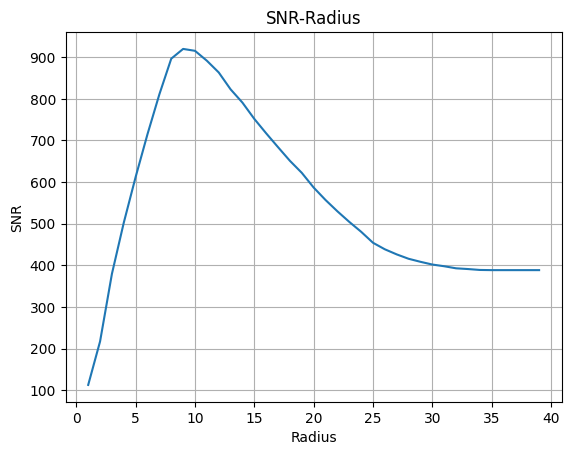

In [5]:
plt.plot(radius_s, snrs)
plt.title("SNR-Radius")
plt.xlabel("Radius")
plt.ylabel("SNR")
plt.grid()

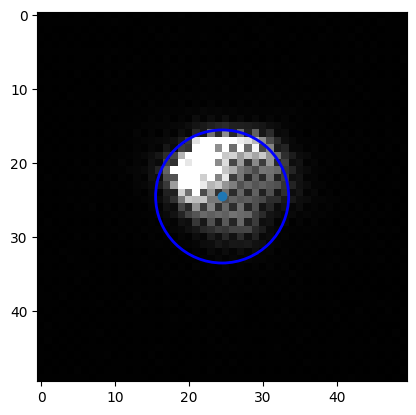

In [6]:
center = [y_com, x_com]

fig, ax = plt.subplots()
plt.imshow(selected_pixel, cmap='gray')
plt.scatter([x_com], [y_com])
ax.add_patch(mpl.patches.Circle(
    center, star_radius, color="blue", fill=False, lw=2))

# Star B

In [7]:
selected_pixel = star_map[1720:1770, 2180:2230]
star_pixels = np.argwhere(selected_pixel > 30)

ymin_sun, xmin_sun = np.min(star_pixels, axis=0)
ymax_sun, xmax_sun = np.max(star_pixels, axis=0)
xdiameter, ydiameter = xmax_sun - xmin_sun, ymax_sun - ymin_sun
y_com, x_com = np.mean(star_pixels, axis=0)

print("X_min:", 2180 + xmin_sun)
print("X_max:", 2180 + xmax_sun)
print("Y_min:", 1720 + ymin_sun)
print("Y_max:", 1720 + ymax_sun)
print("xdiameter:", xdiameter, ", ydiameter:", ydiameter)
print("x com:", 2180 + int(x_com), "y com:", 1720 + int(y_com))

X_min: 2180
X_max: 2229
Y_min: 1720
Y_max: 1769
xdiameter: 49 , ydiameter: 49
x com: 2204 y com: 1744


In [8]:
readnoise = 1
gain = 1

y, x = np.ogrid[0: selected_pixel.shape[-2], 0: selected_pixel.shape[-1]]
pix_dists = np.sqrt((x - x_com)**2 + (y - y_com)**2)

max_snr = 0
snrs = []
radius_s = []
for radius in range(1, 40):
    peak_brightness = np.max(selected_pixel[pix_dists <= 3 * radius])
    star_data = selected_pixel[pix_dists <= radius]
    sum_brightness = np.sum(star_data)

    BG_data = (selected_pixel[(20 < pix_dists) & (pix_dists < 30)])
    BG_brightness = np.median(BG_data) * len(star_data)
    BG_noise = sum_brightness

    corrected_brightness = sum_brightness - BG_brightness
    noise = np.sqrt(
        (BG_noise / gain)
        + (len(star_data) * readnoise)**2)
    snr = corrected_brightness / gain / noise

    if snr > max_snr:
        max_snr = snr
        star_radius = radius
        uncertainty = (1.08 / max_snr) + red_star_uncertainty
        instrumental_mag = -2.5 * np.log10(corrected_brightness/2) + c
    snrs.append(snr)
    radius_s.append(radius)

print("Star Radius:", star_radius)
print("Instrumental Mag:", instrumental_mag)
print("Uncertainty:", uncertainty)

Star Radius: 8
Instrumental Mag: 3.7019219535106203
Uncertainty: 0.002067833876714071


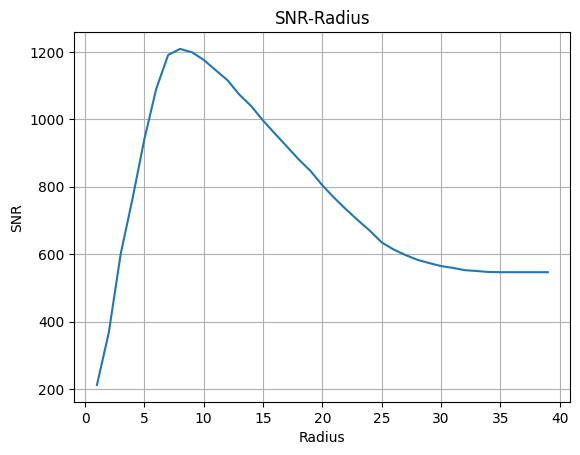

In [9]:
plt.plot(radius_s, snrs)
plt.title("SNR-Radius")
plt.xlabel("Radius")
plt.ylabel("SNR")
plt.grid()

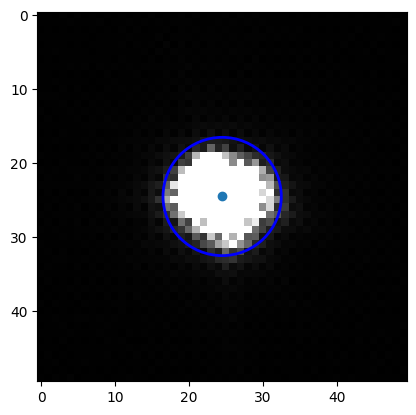

In [10]:
center = [y_com, x_com]

fig, ax = plt.subplots()
plt.imshow(selected_pixel, cmap='gray')
plt.scatter([x_com], [y_com])
ax.add_patch(mpl.patches.Circle(
    center, star_radius, color="blue", fill=False, lw=2))

# Star A

In [11]:
selected_pixel = star_map[1955:2005, 1675:1725]
star_pixels = np.argwhere(selected_pixel > 30)

ymin_sun, xmin_sun = np.min(star_pixels, axis=0)
ymax_sun, xmax_sun = np.max(star_pixels, axis=0)
xdiameter, ydiameter = xmax_sun - xmin_sun, ymax_sun - ymin_sun
y_com, x_com = np.mean(star_pixels, axis=0)

print("X_min:", 1675 + xmin_sun)
print("X_max:", 1675 + xmax_sun)
print("Y_min:", 1955 + ymin_sun)
print("Y_max:", 1955 + ymax_sun)
print("xdiameter:", xdiameter, ", ydiameter:", ydiameter)
print("x com:", 1675 + int(x_com), "y com:", 1955 + int(y_com))

X_min: 1675
X_max: 1724
Y_min: 1955
Y_max: 2004
xdiameter: 49 , ydiameter: 49
x com: 1699 y com: 1979


In [12]:
readnoise = 1
gain = 1

y, x = np.ogrid[0: selected_pixel.shape[-2], 0: selected_pixel.shape[-1]]
pix_dists = np.sqrt((x - x_com)**2 + (y - y_com)**2)

max_snr = 0
snrs = []
radius_s = []
for radius in range(1, 40):
    peak_brightness = np.max(selected_pixel[pix_dists <= 3 * radius])
    star_data = selected_pixel[pix_dists <= radius]
    sum_brightness = np.sum(star_data)

    BG_data = (selected_pixel[(20 < pix_dists) & (pix_dists < 30)])
    BG_brightness = np.median(BG_data) * len(star_data)
    BG_noise = sum_brightness

    corrected_brightness = sum_brightness - BG_brightness
    noise = np.sqrt(
        (BG_noise / gain)
        + (len(star_data) * readnoise)**2)
    snr = corrected_brightness / gain / noise

    if snr > max_snr:
        max_snr = snr
        star_radius = radius
        uncertainty = (1.08 / max_snr) + red_star_uncertainty
        instrumental_mag = -2.5 * np.log10(corrected_brightness/2) + c
    snrs.append(snr)
    radius_s.append(radius)

print("Star Radius:", star_radius)
print("Instrumental Mag:", instrumental_mag)
print("Uncertainty:", uncertainty)

Star Radius: 7
Instrumental Mag: 6.702490339987479
Uncertainty: 0.007546542059742054


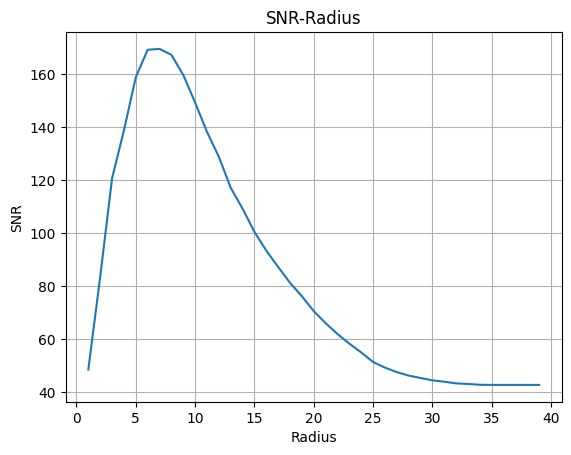

In [13]:
plt.plot(radius_s, snrs)
plt.title("SNR-Radius")
plt.xlabel("Radius")
plt.ylabel("SNR")
plt.grid()

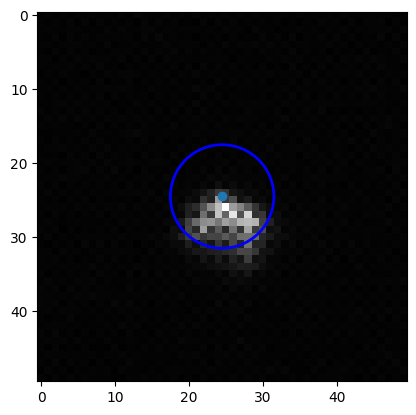

In [14]:
center = [y_com, x_com]

fig, ax = plt.subplots()
plt.imshow(selected_pixel, cmap='gray')
plt.scatter([x_com], [y_com])
ax.add_patch(mpl.patches.Circle(
    center, star_radius, color="blue", fill=False, lw=2))

# Star C

In [15]:
selected_pixel = star_map[1515:1565, 2725:2775]
star_pixels = np.argwhere(selected_pixel > 30)

ymin_sun, xmin_sun = np.min(star_pixels, axis=0)
ymax_sun, xmax_sun = np.max(star_pixels, axis=0)
xdiameter, ydiameter = xmax_sun - xmin_sun, ymax_sun - ymin_sun
y_com, x_com = np.mean(star_pixels, axis=0)

print("X_min:", 2725 + xmin_sun)
print("X_max:", 2725 + xmax_sun)
print("Y_min:", 1515 + ymin_sun)
print("Y_max:", 1515 + ymax_sun)
print("xdiameter:", xdiameter, ", ydiameter:", ydiameter)
print("x com:", 2725 + int(x_com), "y com:", 1515 + int(y_com))

X_min: 2725
X_max: 2774
Y_min: 1515
Y_max: 1564
xdiameter: 49 , ydiameter: 49
x com: 2749 y com: 1539


In [16]:
readnoise = 1
gain = 1

y, x = np.ogrid[0: selected_pixel.shape[-2], 0: selected_pixel.shape[-1]]
pix_dists = np.sqrt((x - x_com)**2 + (y - y_com)**2)

max_snr = 0
snrs = []
radius_s = []
for radius in range(1, 40):
    peak_brightness = np.max(selected_pixel[pix_dists <= 3 * radius])
    star_data = selected_pixel[pix_dists <= radius]
    sum_brightness = np.sum(star_data)

    BG_data = (selected_pixel[(20 < pix_dists) & (pix_dists < 30)])
    BG_brightness = np.median(BG_data) * len(star_data)
    BG_noise = sum_brightness

    corrected_brightness = sum_brightness - BG_brightness
    noise = np.sqrt(
        (BG_noise / gain)
        + (len(star_data) * readnoise)**2)
    snr = corrected_brightness / gain / noise

    if snr > max_snr:
        max_snr = snr
        star_radius = radius
        uncertainty = (1.08 / max_snr) + red_star_uncertainty
        instrumental_mag = -2.5 * np.log10(corrected_brightness/2) + c
    snrs.append(snr)
    radius_s.append(radius)

print("Star Radius:", star_radius)
print("Instrumental Mag:", instrumental_mag)
print("Uncertainty:", uncertainty)

Star Radius: 6
Instrumental Mag: 7.031324246907699
Uncertainty: 0.008456537163255982


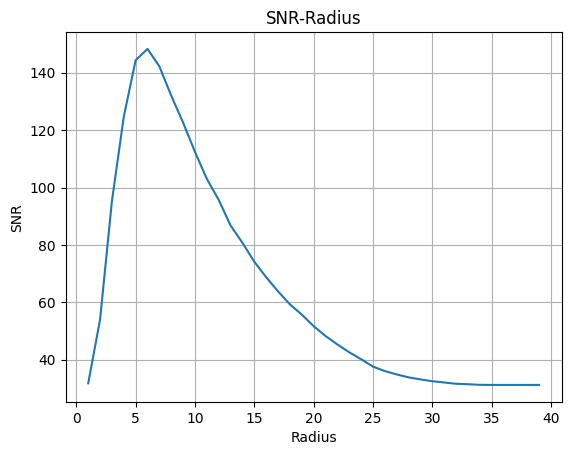

In [17]:
plt.plot(radius_s, snrs)
plt.title("SNR-Radius")
plt.xlabel("Radius")
plt.ylabel("SNR")
plt.grid()

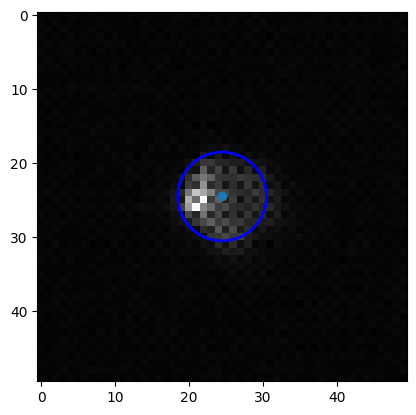

In [18]:
center = [y_com, x_com]

fig, ax = plt.subplots()
plt.imshow(selected_pixel, cmap='gray')
plt.scatter([x_com], [y_com])
ax.add_patch(mpl.patches.Circle(
    center, star_radius, color="blue", fill=False, lw=2))

# Star D

In [19]:
selected_pixel = star_map[1405:1455, 3045:3095]
star_pixels = np.argwhere(selected_pixel > 30)

ymin_sun, xmin_sun = np.min(star_pixels, axis=0)
ymax_sun, xmax_sun = np.max(star_pixels, axis=0)
xdiameter, ydiameter = xmax_sun - xmin_sun, ymax_sun - ymin_sun
y_com, x_com = np.mean(star_pixels, axis=0)

print("X_min:", 3045 + xmin_sun)
print("X_max:", 3045 + xmax_sun)
print("Y_min:", 1405 + ymin_sun)
print("Y_max:", 1405 + ymax_sun)
print("xdiameter:", xdiameter, ", ydiameter:", ydiameter)
print("x com:", 3045 + int(x_com), "y com:", 1405 + int(y_com))

X_min: 3045
X_max: 3094
Y_min: 1405
Y_max: 1454
xdiameter: 49 , ydiameter: 49
x com: 3069 y com: 1429


In [20]:
readnoise = 1
gain = 1

y, x = np.ogrid[0: selected_pixel.shape[-2], 0: selected_pixel.shape[-1]]
pix_dists = np.sqrt((x - x_com)**2 + (y - y_com)**2)

max_snr = 0
snrs = []
radius_s = []
for radius in range(1, 40):
    peak_brightness = np.max(selected_pixel[pix_dists <= 3 * radius])
    star_data = selected_pixel[pix_dists <= radius]
    sum_brightness = np.sum(star_data)

    BG_data = (selected_pixel[(20 < pix_dists) & (pix_dists < 30)])
    BG_brightness = np.median(BG_data) * len(star_data)
    BG_noise = sum_brightness

    corrected_brightness = sum_brightness - BG_brightness
    noise = np.sqrt(
        (BG_noise / gain)
        + (len(star_data) * readnoise)**2)
    snr = corrected_brightness / gain / noise

    if snr > max_snr:
        max_snr = snr
        star_radius = radius
        uncertainty = (1.08 / max_snr) + red_star_uncertainty
        instrumental_mag = -2.5 * np.log10(corrected_brightness/2) + c
    snrs.append(snr)
    radius_s.append(radius)

print("Star Radius:", star_radius)
print("Instrumental Mag:", instrumental_mag)
print("Uncertainty:", uncertainty)

Star Radius: 5
Instrumental Mag: 7.1236366788025265
Uncertainty: 0.008080354147629589


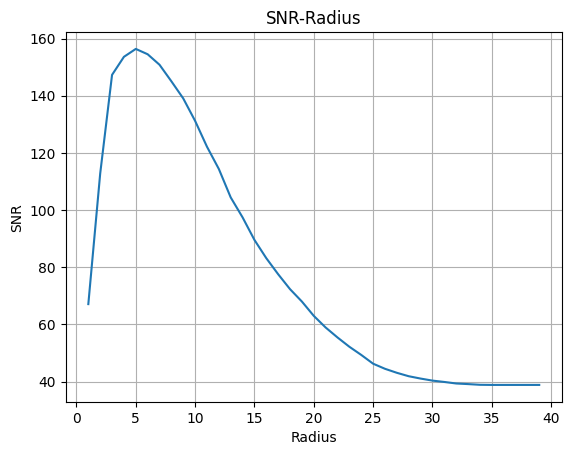

In [21]:
plt.plot(radius_s, snrs)
plt.title("SNR-Radius")
plt.xlabel("Radius")
plt.ylabel("SNR")
plt.grid()

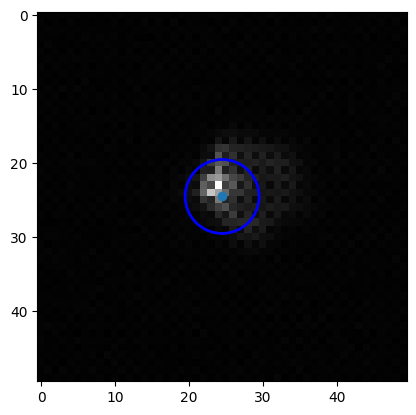

In [22]:
center = [y_com, x_com]

fig, ax = plt.subplots()
plt.imshow(selected_pixel, cmap='gray')
plt.scatter([x_com], [y_com])
ax.add_patch(mpl.patches.Circle(
    center, star_radius, color="blue", fill=False, lw=2))

# Star E

In [23]:
selected_pixel = star_map[1345:1395, 3275:3325]
star_pixels = np.argwhere(selected_pixel > 30)

ymin_sun, xmin_sun = np.min(star_pixels, axis=0)
ymax_sun, xmax_sun = np.max(star_pixels, axis=0)
xdiameter, ydiameter = xmax_sun - xmin_sun, ymax_sun - ymin_sun
y_com, x_com = np.mean(star_pixels, axis=0)

print("X_min:", 3275 + xmin_sun)
print("X_max:", 3275 + xmax_sun)
print("Y_min:", 1345 + ymin_sun)
print("Y_max:", 1345 + ymax_sun)
print("xdiameter:", xdiameter, ", ydiameter:", ydiameter)
print("x com:", 3275 + int(x_com), "y com:", 1345 + int(y_com))

X_min: 3275
X_max: 3324
Y_min: 1345
Y_max: 1394
xdiameter: 49 , ydiameter: 49
x com: 3299 y com: 1369


In [24]:
readnoise = 1
gain = 1

y, x = np.ogrid[0: selected_pixel.shape[-2], 0: selected_pixel.shape[-1]]
pix_dists = np.sqrt((x - x_com)**2 + (y - y_com)**2)

max_snr = 0
snrs = []
radius_s = []
for radius in range(1, 40):
    peak_brightness = np.max(selected_pixel[pix_dists <= 3 * radius])
    star_data = selected_pixel[pix_dists <= radius]
    sum_brightness = np.sum(star_data)

    BG_data = (selected_pixel[(20 < pix_dists) & (pix_dists < 30)])
    BG_brightness = np.median(BG_data) * len(star_data)
    BG_noise = sum_brightness

    corrected_brightness = sum_brightness - BG_brightness
    noise = np.sqrt(
        (BG_noise / gain)
        + (len(star_data) * readnoise)**2)
    snr = corrected_brightness / gain / noise

    if snr > max_snr:
        max_snr = snr
        star_radius = radius
        uncertainty = (1.08 / max_snr) + red_star_uncertainty
        instrumental_mag = -2.5 * np.log10(corrected_brightness/2) + c
    snrs.append(snr)
    radius_s.append(radius)

print("Star Radius:", star_radius)
print("Instrumental Mag:", instrumental_mag)
print("Uncertainty:", uncertainty)

Star Radius: 5
Instrumental Mag: 7.270286174987106
Uncertainty: 0.008925092809641754


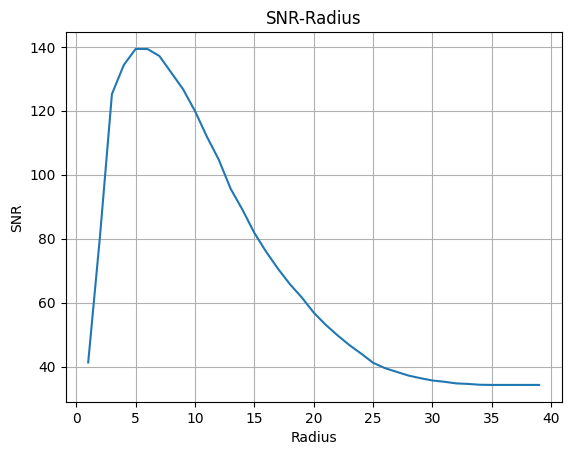

In [25]:
plt.plot(radius_s, snrs)
plt.title("SNR-Radius")
plt.xlabel("Radius")
plt.ylabel("SNR")
plt.grid()

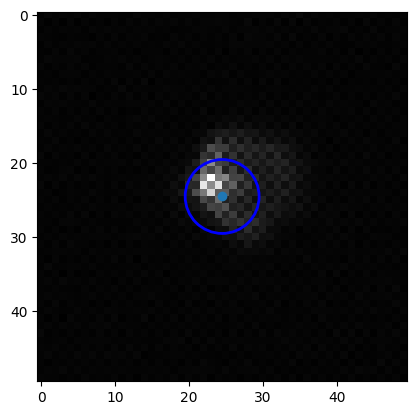

In [26]:
center = [y_com, x_com]

fig, ax = plt.subplots()
plt.imshow(selected_pixel, cmap='gray')
plt.scatter([x_com], [y_com])
ax.add_patch(mpl.patches.Circle(
    center, star_radius, color="blue", fill=False, lw=2))

# Star ?

In [28]:
selected_pixel = star_map[2875:2925, 2810:2860]
star_pixels = np.argwhere(selected_pixel > 30)

ymin_sun, xmin_sun = np.min(star_pixels, axis=0)
ymax_sun, xmax_sun = np.max(star_pixels, axis=0)
xdiameter, ydiameter = xmax_sun - xmin_sun, ymax_sun - ymin_sun
y_com, x_com = np.mean(star_pixels, axis=0)

print("X_min:", 2810 + xmin_sun)
print("X_max:", 2810 + xmax_sun)
print("Y_min:", 2875 + ymin_sun)
print("Y_max:", 2875 + ymax_sun)
print("xdiameter:", xdiameter, ", ydiameter:", ydiameter)
print("x com:", 2810 + int(x_com), "y com:", 2875 + int(y_com))

X_min: 2810
X_max: 2859
Y_min: 2875
Y_max: 2924
xdiameter: 49 , ydiameter: 49
x com: 2834 y com: 2899


In [29]:
readnoise = 1
gain = 1

y, x = np.ogrid[0: selected_pixel.shape[-2], 0: selected_pixel.shape[-1]]
pix_dists = np.sqrt((x - x_com)**2 + (y - y_com)**2)

max_snr = 0
snrs = []
radius_s = []
for radius in range(1, 40):
    peak_brightness = np.max(selected_pixel[pix_dists <= 3 * radius])
    star_data = selected_pixel[pix_dists <= radius]
    sum_brightness = np.sum(star_data)

    BG_data = (selected_pixel[(20 < pix_dists) & (pix_dists < 30)])
    BG_brightness = np.median(BG_data) * len(star_data)
    BG_noise = sum_brightness

    corrected_brightness = sum_brightness - BG_brightness
    noise = np.sqrt(
        (BG_noise / gain)
        + (len(star_data) * readnoise)**2)
    snr = corrected_brightness / gain / noise

    if snr > max_snr:
        max_snr = snr
        star_radius = radius
        uncertainty = (1.08 / max_snr) + red_star_uncertainty
        instrumental_mag = -2.5 * np.log10(corrected_brightness/2) + c
    snrs.append(snr)
    radius_s.append(radius)

print("Star Radius:", star_radius)
print("Instrumental Mag:", instrumental_mag)
print("Uncertainty:", uncertainty)

Star Radius: 5
Instrumental Mag: 10.421567890158036
Uncertainty: 0.12203707172523082


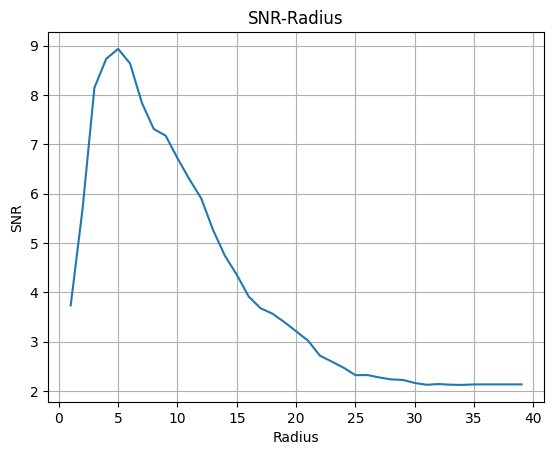

In [30]:
plt.plot(radius_s, snrs)
plt.title("SNR-Radius")
plt.xlabel("Radius")
plt.ylabel("SNR")
plt.grid()

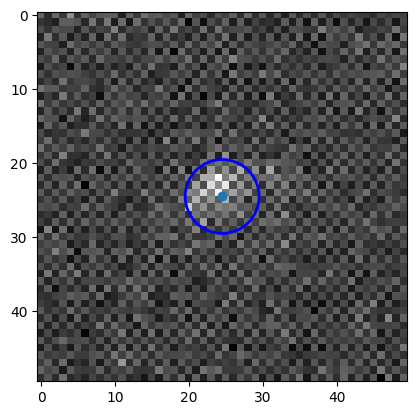

In [31]:
center = [y_com, x_com]

fig, ax = plt.subplots()
plt.imshow(selected_pixel, cmap='gray')
plt.scatter([x_com], [y_com])
ax.add_patch(mpl.patches.Circle(
    center, star_radius, color="blue", fill=False, lw=2))